In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from arch import arch_model
import arch as arch

import warnings
warnings.simplefilter(action='ignore', category=Warning)

%matplotlib inline

In [2]:
futures_yen = pd.read_csv(
    Path("/Users/ameerirfan/Desktop/FT-BTC-Activities/FT-BTC_Unit_10/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
futures_yen.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
futures_yen = futures_yen.loc["1990-01-01":, :]
futures_yen.head()


,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:xlabel='Date'>

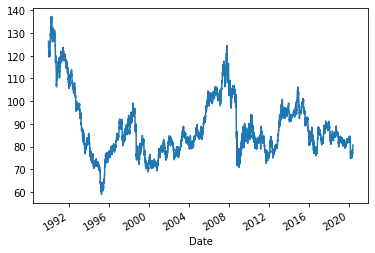

In [4]:
futures_yen.Price.plot()

In [5]:
#Question: Do you see any patterns, long-term and/or short?
print("Answer: It is possible to see the average value of cad_jpy currency pair around 85, with the pattern being that the Japanese Yen is getting stronger compared to the Canadian Dollar. This Conclusion is primarily based on the trend shown in the graph above that from 1992 the currency pair went from 140 to approximately 85 at the present date.")

Answer: It is possible to see the average value of cad_jpy currency pair around 85, with the pattern being that the Japanese Yen is getting stronger compared to the Canadian Dollar. This Conclusion is primarily based on the trend shown in the graph above that from 1992 the currency pair went from 140 to approximately 85 at the present date.


In [6]:
futures_yen_noise, futures_yen_trend = sm.tsa.filters.hpfilter(futures_yen["Price"])

In [7]:
decomposition = futures_yen.Price.to_frame()
decomposition['Noise'] = futures_yen_noise
decomposition['Trend'] = futures_yen_trend
decomposition.head()

,Price,Noise,Trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


<AxesSubplot:xlabel='Date'>

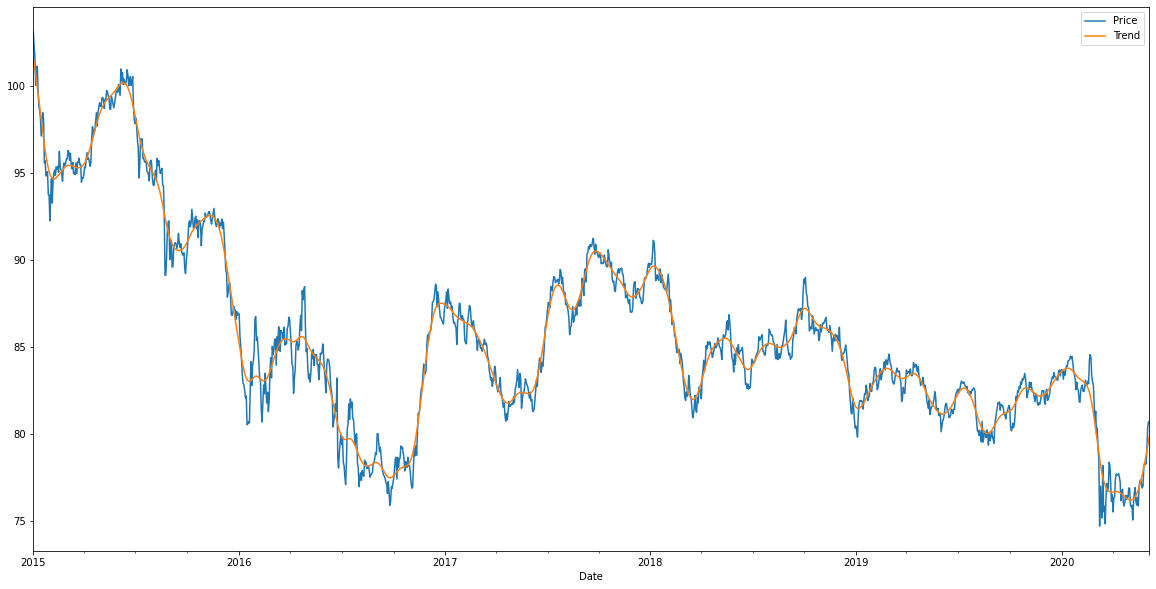

In [8]:
decomposition[['Price', 'Trend']]['2015-01':].plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

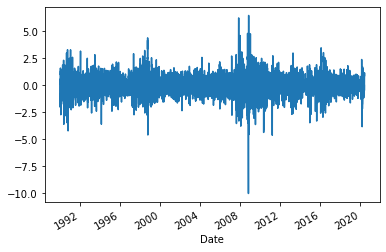

In [9]:
futures_yen_noise.plot()

In [10]:
yen_returns = (futures_yen[["Price"]].pct_change() * 100)
yen_returns = yen_returns.replace(-np.inf, np.nan).dropna()
yen_returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [12]:
yen_model_ARMA = sm.tsa.arima.ARIMA(yen_returns, order=(2, 1,1))
yen_results_ARMA = yen_model_ARMA.fit()

yen_results_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7928
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9756.104
Date:                Sun, 07 Aug 2022   AIC                          19520.208
Time:                        02:42:10   BIC                          19548.120
Sample:                             0   HQIC                         19529.767
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0303      0.007     -4.451      0.000      -0.044      -0.017
ar.L2         -0.0019      0.006     -0.298      0.766      -0.014       0.011
ma.L1         -1.0000      0.007   -141.061      0.000      -1.014      -0.986
sigma2         0.6855      0.008     86.892      0.000       0.670       0.701
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11627.63
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
yen_results_ARMA.forecast(steps=5)

7928   -0.003361
7929   -0.002195
7930   -0.002200
7931   -0.002202
7932   -0.002202
Name: predicted_mean, dtype: float64

In [14]:
df_1= pd.DataFrame(yen_results_ARMA.forecast(steps=5))

df_1

,predicted_mean
7928,-0.003361
7929,-0.002195
7930,-0.002200
7931,-0.002202
7932,-0.002202


<AxesSubplot:>

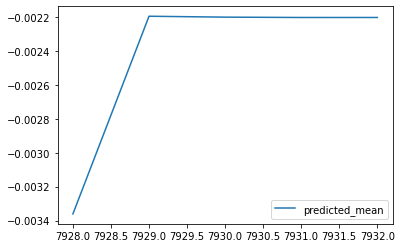

In [15]:
df_1.plot()

In [16]:
df_2 = pd.DataFrame(futures_yen)

df_2

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21
...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75
2020-06-01,79.27,78.21,79.36,78.04
2020-06-02,80.40,79.26,80.56,79.15


In [17]:
yen_model_ARIMA = sm.tsa.arima.ARIMA(df_2["Open"].values, order=(5, 1, 1))
yen_result_ARIMA = yen_model_ARIMA.fit()

In [18]:
yen_result_ARIMA.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8835.377
Date:                Sun, 07 Aug 2022   AIC                          17684.755
Time:                        02:42:18   BIC                          17733.602
Sample:                             0   HQIC                         17701.482
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4080      0.260      1.570      0.116      -0.101       0.917
ar.L2          0.0232      0.013      1.798      0.072      -0.002       0.048
ar.L3         -0.0119      0.009     -1.356      0.175      -0.029       0.005
ar.L4          0.0203      0.008      2.496      0.013       0.004       0.036
ar.L5         -0.0277      0.007     -3.797      0.000      -0.042      -0.013
ma.L1         -0.4486      0.261     -1.721      0.085      -0.959       0.062
sigma2         0.5439      0.004    123.013      0.000       0.535       0.553
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11257.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'5 Days Future Forecast'}>

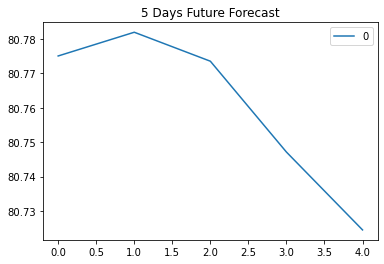

In [19]:
pd.DataFrame(yen_result_ARIMA.forecast(steps=5)).plot(title="5 Days Future Forecast")

In [20]:
yen_result_ARIMA.forecast(steps=5)

array([80.77509529, 80.78199468, 80.7735715 , 80.74714968, 80.72451003])

In [23]:
model_arch = arch_model(yen_returns, mean="Zero", vol="GARCH", p=2, q=1)
result = model_arch.fit(disp="off")

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Sun, Aug 07 2022   Df Residuals:                     7928
Time:                        02:43:55   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [25]:
last_day = yen_returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [27]:
forecast_horizon = 5

forecasts = result.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [29]:
WIP = np.sqrt(forecasts.variance.dropna() * 252)
WIP.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [30]:
final = WIP.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

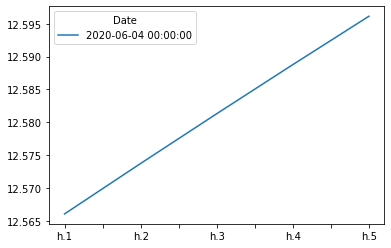

In [31]:
final.plot()